In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

In [2]:
file_path = r'E:\datasets\user_behavior_dataset.csv'

df= pd.read_csv(file_path)

In [3]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [4]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
df.drop(['User ID'], axis=1, inplace=True)

In [7]:
object_columns = df.select_dtypes(include=['object']).columns

In [8]:
print(object_columns)

Index(['Device Model', 'Operating System', 'Gender'], dtype='object')


In [9]:
le = LabelEncoder()

for col in object_columns:
    df[col] = le.fit_transform(df[col])

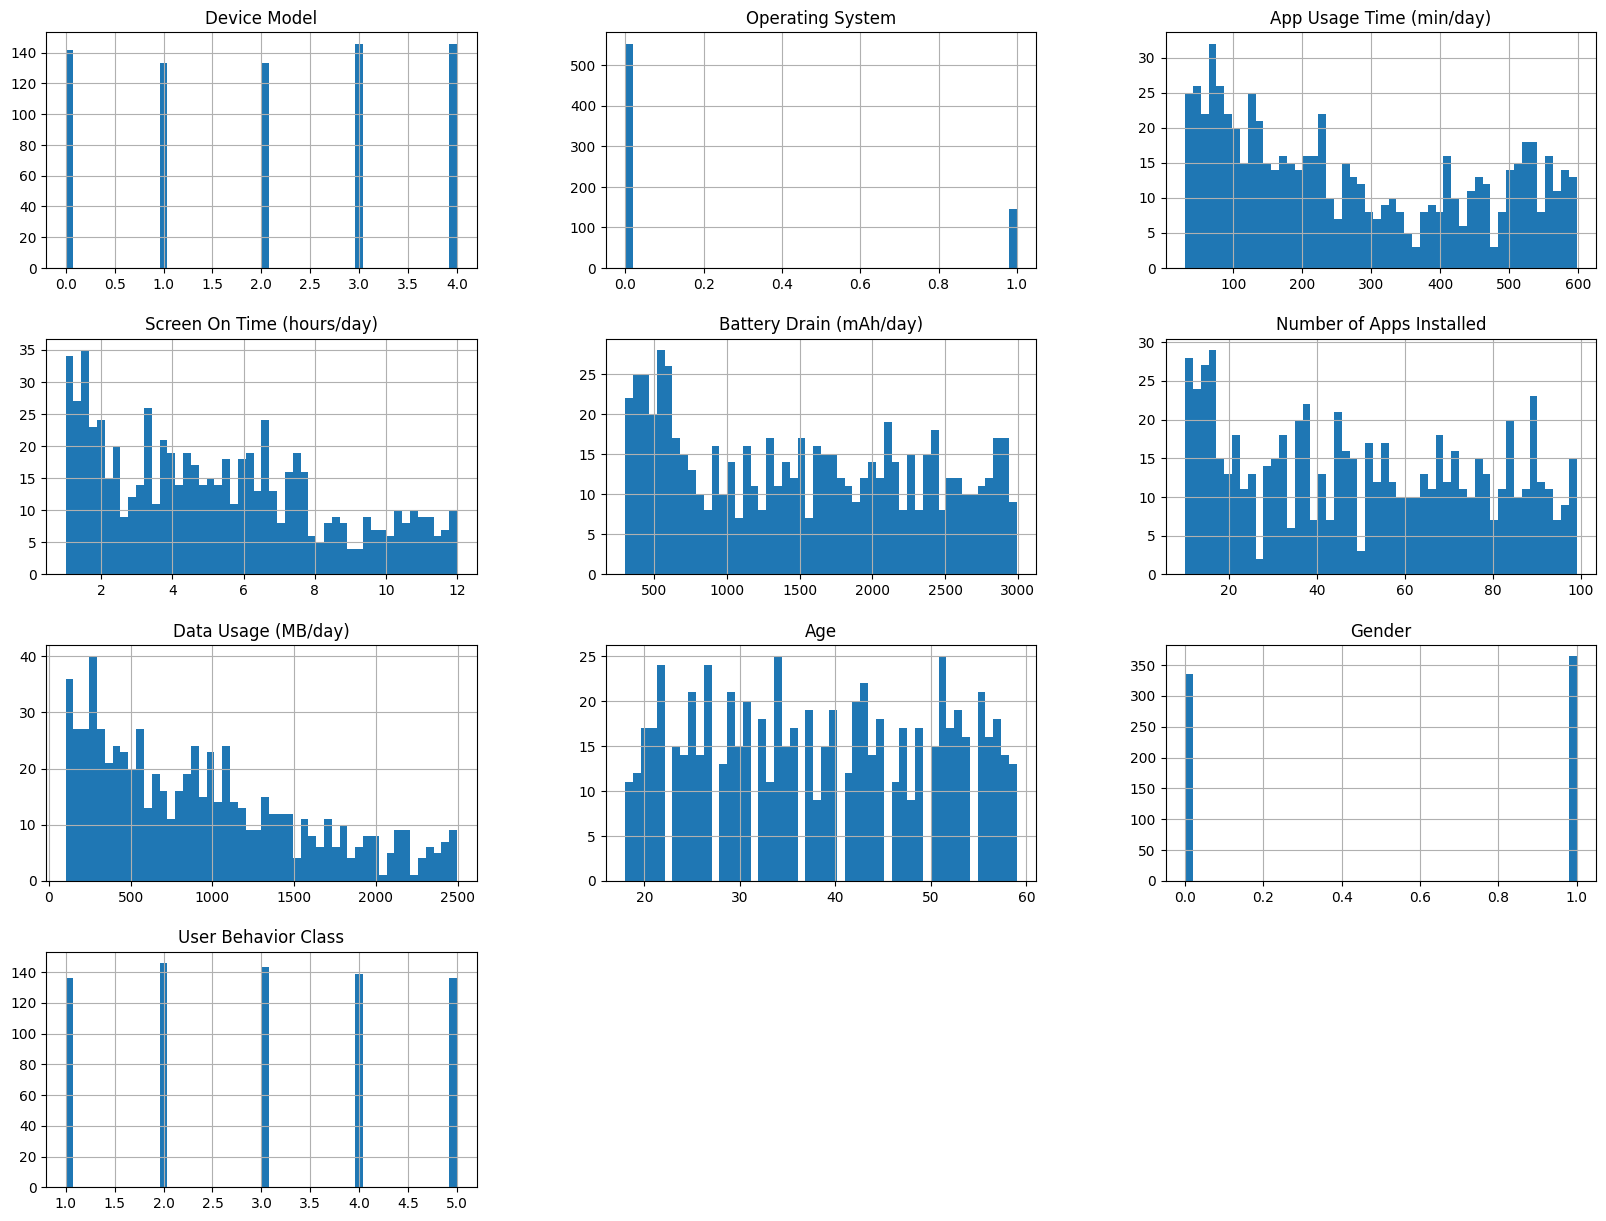

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
def plot_pie(feature):
    fig, ax = plt.subplots()
    ax.pie(df[feature].value_counts(), labels=df[feature].unique(), autopct='%1.1f%%')
    ax.set_title(f'Distribution of {feature}')
    plt.show()

In [12]:
count = {}

for i in df.columns:
    count[i]=df[i].nunique()

In [13]:
count

{'Device Model': 5,
 'Operating System': 2,
 'App Usage Time (min/day)': 387,
 'Screen On Time (hours/day)': 108,
 'Battery Drain (mAh/day)': 628,
 'Number of Apps Installed': 86,
 'Data Usage (MB/day)': 585,
 'Age': 42,
 'Gender': 2,
 'User Behavior Class': 5}

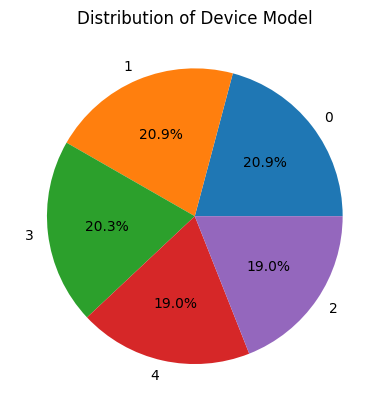

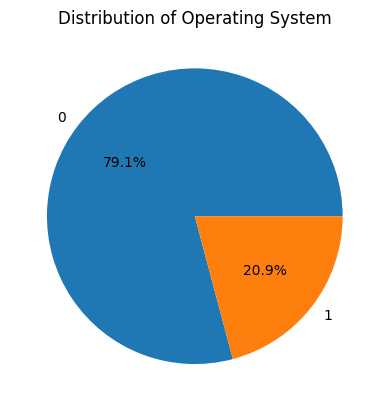

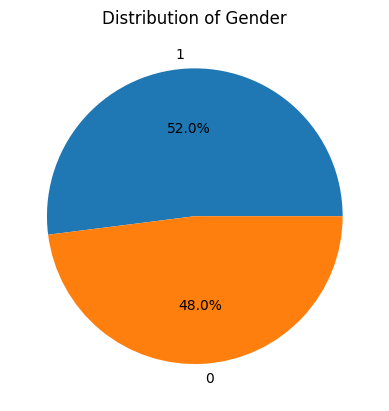

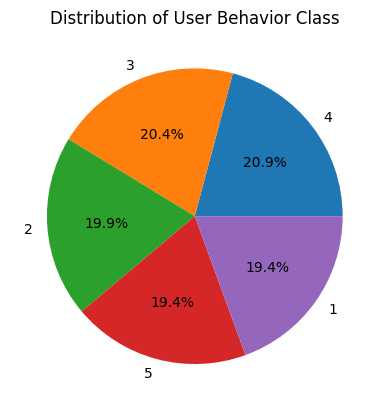

In [14]:
for i in count:
    if count[i] <= 10:
        plot_pie(i)

In [15]:
def plot_heatmap(df):

    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap', fontsize=15)
    plt.show()

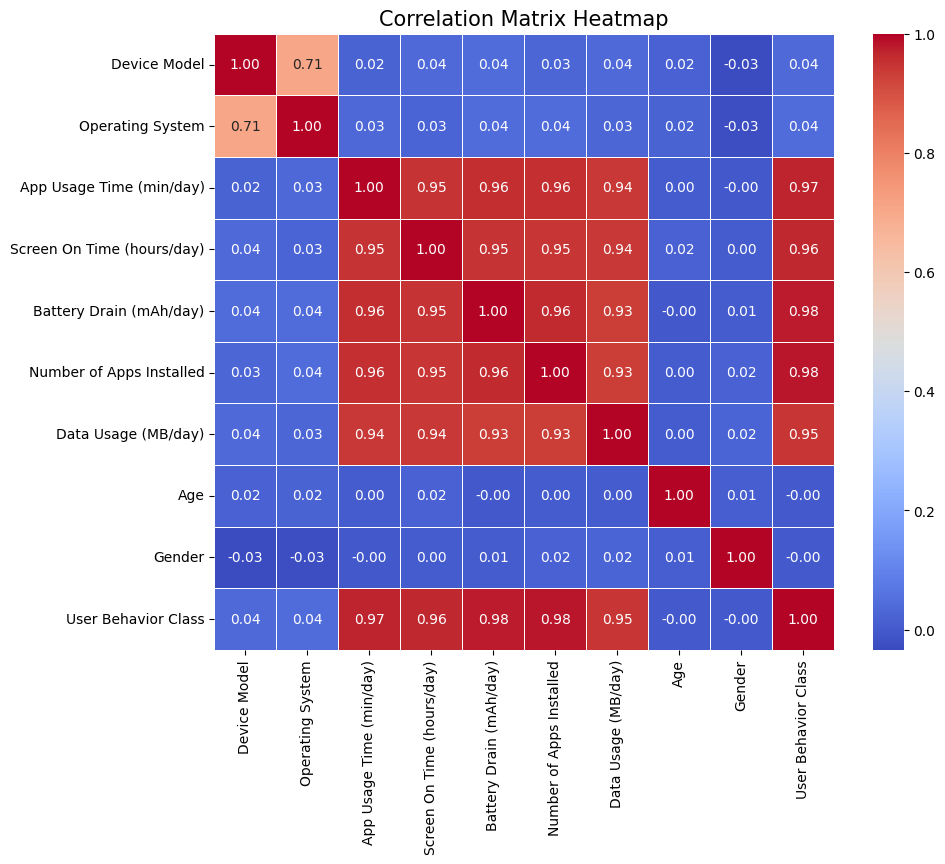

In [16]:
plot_heatmap(df)

C:\Users\atiya\AppData\Local\Temp\ipykernel_12856\1439551783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='User Behavior Class', palette='Set2')


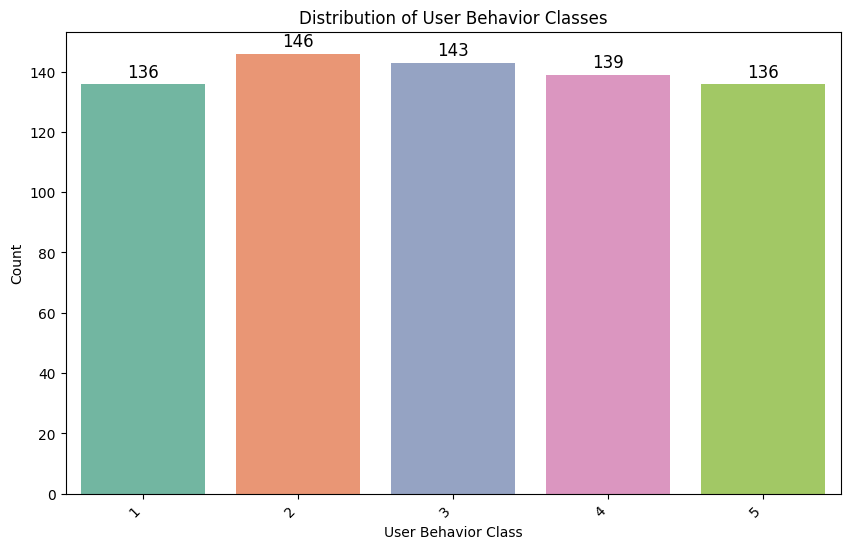

In [17]:
#countplot diagram
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='User Behavior Class', palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.title('Distribution of User Behavior Classes')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [18]:
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3
...,...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,381,22,1,2
696,3,0,316,6.8,1965,68,1201,59,1,4
697,0,0,99,3.1,942,22,457,50,0,2
698,2,0,62,1.7,431,13,224,44,1,1


In [19]:
# Split the data into features and labels
X = df.drop(['User Behavior Class'], axis=1)
y = df['User Behavior Class']

In [20]:
X

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,0,0,393,6.4,1872,67,1122,40,1
1,1,0,268,4.7,1331,42,944,47,0
2,3,0,154,4.0,761,32,322,42,1
3,0,0,239,4.8,1676,56,871,20,1
4,4,1,187,4.3,1367,58,988,31,0
...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,381,22,1
696,3,0,316,6.8,1965,68,1201,59,1
697,0,0,99,3.1,942,22,457,50,0
698,2,0,62,1.7,431,13,224,44,1


In [21]:
y

0      4
1      3
2      2
3      3
4      3
      ..
695    2
696    4
697    2
698    1
699    3
Name: User Behavior Class, Length: 700, dtype: int64

In [22]:
unique_values = np.unique(y)
print(unique_values)

[1 2 3 4 5]


In [23]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [24]:
# Split into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
# One-hot encode the categorical features
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)

In [26]:
# Align X_train, X_val, and X_test to have the same columns
X_train, X_val = X_train.align(X_val, join='outer', axis=1, fill_value=0)
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)
X_val, X_test = X_val.align(X_test, join='outer', axis=1, fill_value=0)

In [27]:
# One-hot encode the target labels
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = one_hot_encoder.transform(y_val.reshape(-1, 1))

In [28]:
# Scale the features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [29]:
# create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Get the model score in train, test, and validation sets
train_score = rf.score(X_train, y_train)
val_score = rf.score(X_val, y_val)
test_score = rf.score(X_test, y_test)

In [32]:
print("Train Score:", train_score)
print("Validation Score:", val_score)
print("Test Score:", test_score)

Train Score: 1.0
Validation Score: 1.0
Test Score: 1.0


In [33]:
# Print the classification report and confusion matrix for the test set
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict the labels of the test set
y_pred = rf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the precision, recall, and F1-score of the model
precision = cm[0, 0] / (cm[0, 0] + cm[0, 1])
recall = cm[0, 0] / (cm[0, 0] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



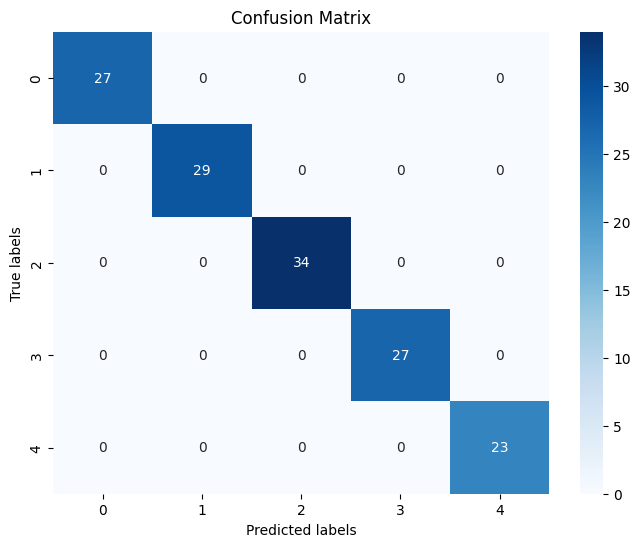

In [35]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [36]:
# Build a simple ANN model
model = Sequential()
model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))  # Hidden layer
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))  # Output layer

# Compile the ANN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Train the ANN model
model.fit(X_train, y_train_onehot, epochs=50, batch_size=16, validation_data=(X_val, y_val_onehot))

Epoch 1/50
28/28 [==============================] - 1s 10ms/step - loss: 1.6082 - accuracy: 0.2500 - val_loss: 1.6045 - val_accuracy: 0.6339
Epoch 2/50
28/28 [==============================] - 0s 4ms/step - loss: 1.5944 - accuracy: 0.5580 - val_loss: 1.5631 - val_accuracy: 0.5179
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 1.5258 - accuracy: 0.3817 - val_loss: 1.4129 - val_accuracy: 0.4821
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 1.3598 - accuracy: 0.3750 - val_loss: 1.1692 - val_accuracy: 0.4821
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 1.1636 - accuracy: 0.3750 - val_loss: 0.9940 - val_accuracy: 0.4821
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 1.0242 - accuracy: 0.3750 - val_loss: 0.8998 - val_accuracy: 0.4911
Epoch 7/50
28/28 [==============================] - 0s 4ms/step - loss: 0.9416 - accuracy: 0.3906 - val_loss: 0.8463 - val_accuracy: 0.5179
Epoch 8/50
28/28 [=

In [39]:
# Classification report and confusion matrix for ANN
y_pred_ann = model.predict(X_test)
y_pred_class_ann = np.argmax(y_pred_ann, axis=1)

5/5 [==============================] - 0s 1ms/step


In [40]:
print("ANN Classification Report:")
print(classification_report(y_test, y_pred_class_ann))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class_ann))

ANN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


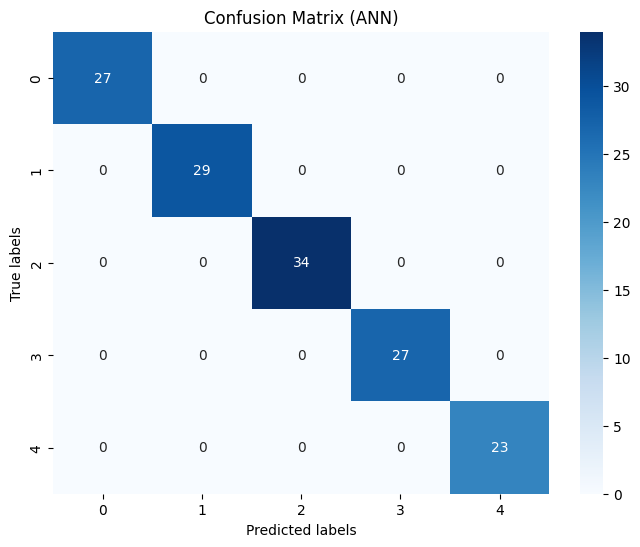

In [41]:
# Confusion matrix heatmap for ANN
cm_ann = confusion_matrix(y_test, y_pred_class_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (ANN)")
plt.show()